## Test Componenwise Conditional Spline Flow

In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import LiLY
from LiLY.modules.components.flow import ComponentWiseCondSpline
import torch

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

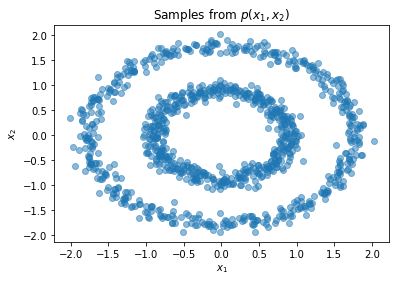

/home/weiran/anaconda3/envs/ltcl/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/weiran/anaconda3/envs/ltcl/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


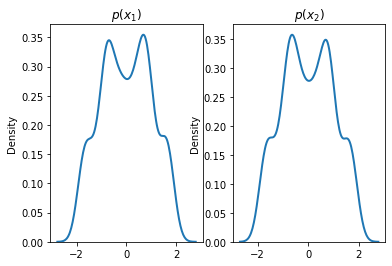

In [6]:
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import seaborn as sns

n_samples = 1000
X, y = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
X = StandardScaler().fit_transform(X)

plt.title(r'Samples from $p(x_1,x_2)$')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.scatter(X[:,0], X[:,1], alpha=0.5)
plt.show()

plt.subplot(1, 2, 1)
sns.distplot(X[:,0], hist=False, kde=True,
             bins=None,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
plt.title(r'$p(x_1)$')
plt.subplot(1, 2, 2)
sns.distplot(X[:,1], hist=False, kde=True,
             bins=None,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
plt.title(r'$p(x_2)$')
plt.show()

In [8]:
flow = ComponentWiseCondSpline(input_dim=1, context_dim=1)

In [10]:
dataset = torch.tensor(X, dtype=torch.float)
optimizer = torch.optim.Adam(flow.parameters(), lr=1e-2)

In [12]:
dataset.shape

torch.Size([1000, 2])

In [13]:
for step in range(500):
    optimizer.zero_grad()
    loss = -flow.log_prob(dataset[:,0:1], dataset[:,1:2]).mean()
    loss.backward()
    optimizer.step()

In [15]:
x2_sampled = flow.sample(dataset[:,0:1], 1000)

In [20]:
reconstructed = torch.cat((dataset[:,0:1], x2_sampled), dim=-1).detach().numpy()

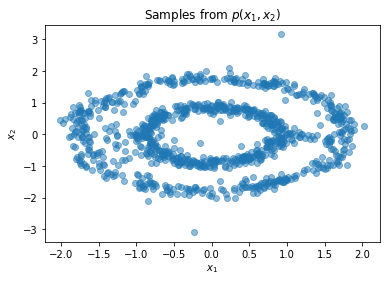

/home/weiran/anaconda3/envs/ltcl/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/weiran/anaconda3/envs/ltcl/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


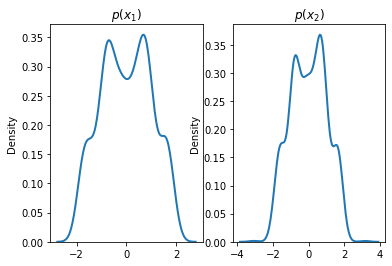

In [22]:
plt.title(r'Samples from $p(x_1,x_2)$')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.scatter(reconstructed[:,0], reconstructed[:,1], alpha=0.5)
plt.show()

plt.subplot(1, 2, 1)
sns.distplot(reconstructed[:,0], hist=False, kde=True,
             bins=None,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
plt.title(r'$p(x_1)$')
plt.subplot(1, 2, 2)
sns.distplot(reconstructed[:,1], hist=False, kde=True,
             bins=None,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
plt.title(r'$p(x_2)$')
plt.show()